In [1]:
import numpy as np
from scipy import integrate as intg 
from scipy import optimize as opt
from matplotlib import pyplot as plt 
import time 
import Eilenberger as eil

plt.rcParams['font.size']=14
plt.rcParams['text.usetex']=True

In [ ]:
ntheta = 20
cutoff = 10.*eil.BCS_ratio
nw = 60

fine_nw = 250
fine_cutoff = 2.*eil.BCS_ratio

ntemps = 10
temps = np.linspace(0.5,1.2,ntemps)

gaps = np.zeros((ntemps),dtype=complex)
times = np.zeros_like(gaps)
grs = []

sim = eil.Eilenberger(nw,ntheta,cutoff,fine_grid=(fine_nw,fine_cutoff))
sim.verbose = True
sim.set_gamma_imp(0.03)
sim.set_Dynes_eta(0.03)
sim.set_Q0(0.)
sim.set_Tc(1.)
sim.set_BCS_coupling(sim.calc_BCS_coupling() )

sim.scba_step = 0.05
sim.scba_err = 1.e-3

for i in range(ntemps):
    print(str(i))
    sim.set_temperature(temps[i])
    t0 = time.time()
    if i > 0:
        gap, gr  = sim.calc_eq(gaps[i-1])
        print(gap)
        gaps[i] = gap
        grs.append(gr)
    else:
        gap, gr = sim.calc_eq()
        print(gap)
        gaps[i] = gap
        grs.append(gr)
    t1 = time.time()
    times[i] = t1-t0


0
Loop: 0, err: 0.011341975968543961, gap: (1.7121987376364611-0j)
Loop: 1, err: 0.011947003089158137, gap: (1.7039281914375832-0j)
Loop: 2, err: 0.012233729374032339, gap: (1.6983187729866343-0j)
Loop: 3, err: 0.01145941390485279, gap: (1.7001988834331838-0j)
Loop: 4, err: 0.008551662902343209, gap: (1.7209401818632195-0j)
Loop: 5, err: 0.007163490332259127, gap: (1.7456877894553182-0j)
Loop: 6, err: 0.006694857157507675, gap: (1.7477656835611277-0j)
Loop: 7, err: 0.006209872130049219, gap: (1.7472106270977974-0j)
Loop: 8, err: 0.005776479176183788, gap: (1.7464402277976077-0j)
Loop: 9, err: 0.005390648892101067, gap: (1.7456427554747398-0j)
Loop: 10, err: 0.005045392918151271, gap: (1.744841830677779-0j)
Loop: 11, err: 0.004735245806860663, gap: (1.7440365886128866-0j)
Loop: 12, err: 0.004456233710945251, gap: (1.7432215740215833-0j)
Loop: 13, err: 0.004205522332461742, gap: (1.742390605746502-0j)
Loop: 14, err: 0.003981138823342191, gap: (1.7415375822644406-0j)
Loop: 15, err: 0.0037

In [ ]:
plt.plot(temps,np.abs(gaps[:]),marker='.')
plt.axhline(0.,color='gray',linestyle='dashed')
plt.show()
plt.plot(temps,times[:])
plt.yscale('log')
plt.show()


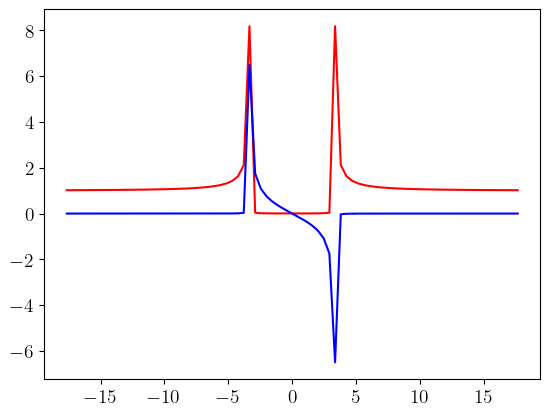

In [4]:
plt.plot(sim.w_arr,np.real(grs[0][0,0,:,0]),'red')
plt.plot(sim.w_arr,np.imag(grs[0][0,0,:,0]),'blue')
plt.show()

In [11]:
print(eil.BCS_ratio*2)
print(sim.Tc)

3.527753977724091
1.0


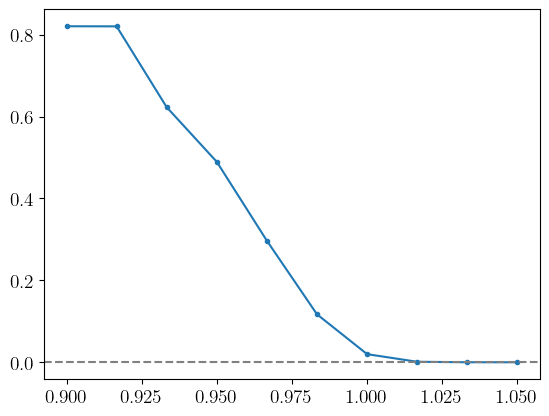

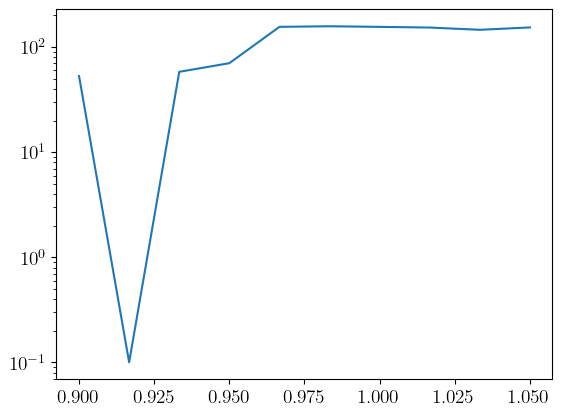

Total time: 18min


In [3]:
plt.plot(temps,gaps[:],marker='.')
plt.axhline(0.,color='gray',linestyle='dashed')
plt.show()
plt.plot(temps,times[:])
plt.yscale('log')
plt.show()
print(f"Total time: {np.sum(times)/60.:0.0f}min")

In [2]:
Tc = 1.

ntheta = 50
cutoff = 10.*eil.BCS_ratio*Tc
nw = 100
fine_nw = 200
fine_cutoff = 1.*eil.BCS_ratio*Tc

sim = eil.Eilenberger(nw,ntheta,cutoff,fine_grid=(fine_nw,fine_cutoff))
sim.verbose = True
sim.set_gamma_imp(0.3)
sim.set_Dynes_eta(0.03)
sim.set_Tc(1.)
sim.set_BCS_coupling(sim.calc_BCS_coupling() )
sim.set_temperature(0.1*Tc)

nDelta = 10
nQ = 5
t0 = time.time()
sim.precompute_hr(nDelta,nQ)
t1 = time.time()
print(f"{sim.nDelta} x {sim.nQ} grid precomputation of hR: {t1-t0:0.2f}s")

Precompute loop: 0/10 x 0/5
Gap: 0.000
Q: -17.639
Loop: 0, err: 0.010841887346305753
Loop: 1, err: 0.01029978541209358
Loop: 2, err: 0.009784786649030198
Loop: 3, err: 0.009295536466178372
Loop: 4, err: 0.008830747892625185
Loop: 5, err: 0.008389198214885785
Loop: 6, err: 0.007969725779540526
Loop: 7, err: 0.007571226953283613
Loop: 8, err: 0.0071926532328873615
Loop: 9, err: 0.006833008497903301
Loop: 10, err: 0.006491346399235988
Loop: 11, err: 0.0061667678770252745
Loop: 12, err: 0.005858418801567987
Loop: 13, err: 0.005565487731292847
Loop: 14, err: 0.00528720378207828
Loop: 15, err: 0.005022834602464729
Loop: 16, err: 0.0047716844495696315
Loop: 17, err: 0.004533092360754626
Loop: 18, err: 0.004306430416331785
Loop: 19, err: 0.004091102088817452
Loop: 20, err: 0.0038865406744590355
Loop: 21, err: 0.003692207802964948
Loop: 22, err: 0.0035075920215649086
Loop: 23, err: 0.003332207449714921
Loop: 24, err: 0.0031655925009412634
Loop: 25, err: 0.003007308668489018
Loop: 26, err: 0.002

KeyboardInterrupt: 

In [4]:
sim._calc_gr(0.,0.)

The maximum number of iterations allowed has been reached.


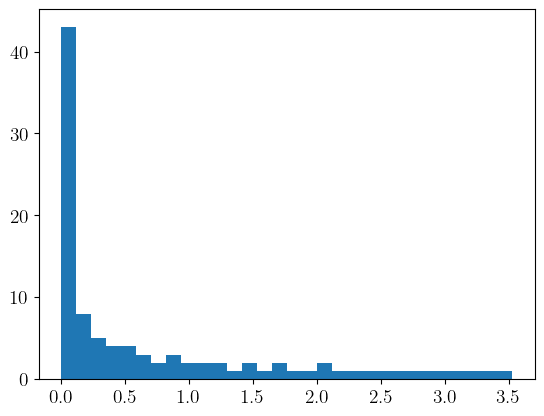

In [19]:
plt.hist(np.abs(sim.Deltas),30)
plt.show()

In [9]:
sim.sigma_r_grid.shape

(2, 2, 301, 50, 100, 50)

In [15]:
print(sim.sigma_r_grid[...,0,0].nbytes/1e6)

0.9632


In [3]:
Tc = 1.

ntheta = 50
cutoff = 10.*eil.BCS_ratio*Tc
nw = 100
fine_nw = 200
fine_cutoff = 1.*eil.BCS_ratio*Tc

sim = eil.Eilenberger(nw,ntheta,cutoff,fine_grid=(fine_nw,fine_cutoff))
sim.verbose = True
sim.set_gamma_imp(0.3)
sim.set_Dynes_eta(0.03)
sim.set_Tc(1.)
sim.set_BCS_coupling(sim.calc_BCS_coupling() )
sim.set_temperature(0.1*Tc)


sim.calc_eq_gap(1.)

Loop: 0, err: 0.049928642693336044
Loop: 1, err: 0.047423021959325434
Loop: 2, err: 0.04504332302987056
Loop: 3, err: 0.042783224102969954
Loop: 4, err: 0.04063671666882498
Loop: 5, err: 0.03859809088409388
Loop: 6, err: 0.03666192146556957
Loop: 7, err: 0.034823054113879655
Loop: 8, err: 0.033076592471437134
Loop: 9, err: 0.031417885613712594
Loop: 10, err: 0.029842516068751386
Loop: 11, err: 0.028346288356571606
Loop: 12, err: 0.026925218037499605
Loop: 13, err: 0.025575521256524746
Loop: 14, err: 0.02429360476927122
Loop: 15, err: 0.023076056434114645
Loop: 16, err: 0.021919636154242413
Loop: 17, err: 0.020821267253003733
Loop: 18, err: 0.019778028265672286
Loop: 19, err: 0.01878714513070578
Loop: 20, err: 0.017845983763694284
Loop: 21, err: 0.016952042997417864
Loop: 22, err: 0.016102947871752118
Loop: 23, err: 0.015296443257552273
Loop: 24, err: 0.014530387799090941
Loop: 25, err: 0.01380274816010821
Loop: 26, err: 0.01311159355904569
Loop: 27, err: 0.012455090579563692
Loop: 28, 

(1.730481814713204+0.3648147231001938j)